# Exploratory Data Analysis

## Import data and make necessary adjustments

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn

In [10]:
df = pd.read_csv('../data_cleaning/clean_dataset.csv')

In [11]:
df.head()

,order_id,product,quantity_ordered,price_each,order_date,purchase_address,month_name,city,state_code,state
0,15502.0,iPhone,1,700.00000,2019-02-18 01:35:00,"866 Spruce St, Portland, ME 04101",February,Portland,ME,Maine
1,15503.0,AA Batteries (4-pack),1,3.84000,2019-02-13 07:24:00,"18 13th St, San Francisco, CA 94016",February,San Francisco,CA,California
2,15504.0,27in 4K Gaming Monitor,1,389.98999,2019-02-18 09:46:00,"52 6th St, New York City, NY 10001",February,New York City,NY,New York
3,15505.0,Lightning Charging Cable,1,14.95000,2019-02-02 16:47:00,"129 Cherry St, Atlanta, GA 30301",February,Atlanta,GA,Georgia
4,15506.0,AA Batteries (4-pack),2,3.84000,2019-02-28 20:32:00,"548 Lincoln St, Seattle, WA 98101",February,Seattle,WA,Washington


### Set the appropiate dtypes

In [14]:
df.dtypes

order_id                   float64
product                     object
quantity_ordered             int64
price_each                 float64
order_date          datetime64[ns]
purchase_address            object
month_name                  object
city                        object
state_code                  object
state                       object
dtype: object

In [13]:
df.order_date = pd.to_datetime(df.order_date)

#### Set `month_name` as an ordered categorical dtype 

In [15]:
months_ordered = 'january, february, march, april, may, june, july, august, september, october, november, december'.title().split(', ')

In [16]:
df.month_name = df.month_name.astype(pd.CategoricalDtype(categories=months_ordered, ordered=True))

### Display options to avoid scientific notation

In [36]:
pd.set_option('display.float_format', '{:.2f}'.format)

## Create a revenue column

In [56]:
df['revenue'] = df.price_each * df.quantity_ordered

## Sales per month

In [57]:
sales_per_month = df[['quantity_ordered', 'price_each', 'order_date', 'month_name', 'revenue']]

In [58]:
monthly_sales = sales_per_month.groupby('month_name').revenue.sum().sort_index()

C:\Users\danie\AppData\Local\Temp\ipykernel_10408\2664533396.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monthly_sales = sales_per_month.groupby('month_name').revenue.sum().sort_index()


In [59]:
monthly_sales

month_name
January     2284818.58
February    2393981.88
March       2791020.40
April       3228561.29
May         3031130.13
June        2683101.39
July        2719467.97
August      2442972.90
September   2410665.79
October     3473646.64
November    3084853.97
December    3921316.84
Name: revenue, dtype: float64

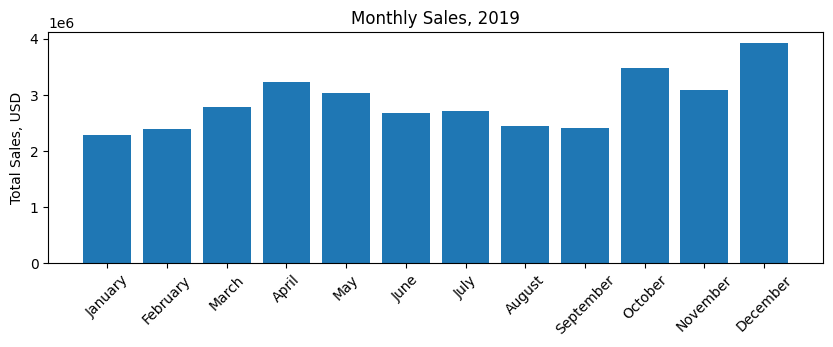

In [60]:
fig, ax = plt.subplots(figsize=(10,3))
ax.bar(x=monthly_sales.index, height=monthly_sales.values)
plt.xticks(rotation=45)
ax.set_title('Monthly Sales, 2019')
ax.set_ylabel('Total Sales, USD')
plt.show()

## Question: Did sales decrease during Spring and Summer?  
The Accountant reported that we made loss in the month of April, May, June and July as compared to other month. Is this true?

In [45]:
april_sales = monthly_sales['April']
avg_sales = monthly_sales.mean()
april_sales, avg_sales

(3228561.2942245007, 2872128.1472046175)

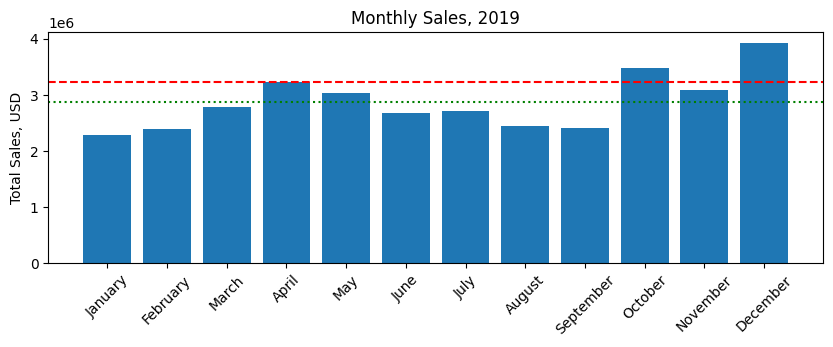

In [47]:
fig, ax = plt.subplots(figsize=(10,3))
ax.bar(x=monthly_sales.index, height=monthly_sales.values)
ax.axhline(april_sales, ls='dashed', color='r')
ax.axhline(avg_sales, ls='dotted', color='g')
plt.xticks(rotation=45)
ax.set_title('Monthly Sales, 2019')
ax.set_ylabel('Total Sales, USD')
plt.show()

As it can be seen in the chart, April had the highest sales figures in the Spring season. Effectively, monthly sales from May to August have decreased compared to April value and are below the average figure. But definitely April has not a low figure regarding to sales.

## Question: Should we place more marketing attention on selected cities?
The Assistant manager suggested that we should place more marketing attention on the following cities - Los Angeles, New York, Atlanta, San Francisco and Seattle as they seem to generate more revenue. From the result of your analysis, do you agree with this? Should we proceed with the suggestion?

### Sales per city

In [63]:
city_sales = df[['quantity_ordered', 'price_each', 'city', 'revenue']]

In [64]:
sales_per_city = city_sales.groupby('city')['revenue'].sum().sort_values(ascending=False)
sales_per_city

city
San Francisco   8254743.51
Los Angeles     5448304.25
New York City   4661867.12
Boston          3658627.63
Atlanta         2794199.06
Dallas          2765373.95
Seattle         2745046.01
Portland        2319331.93
Austin          1818044.32
Name: revenue, dtype: float64

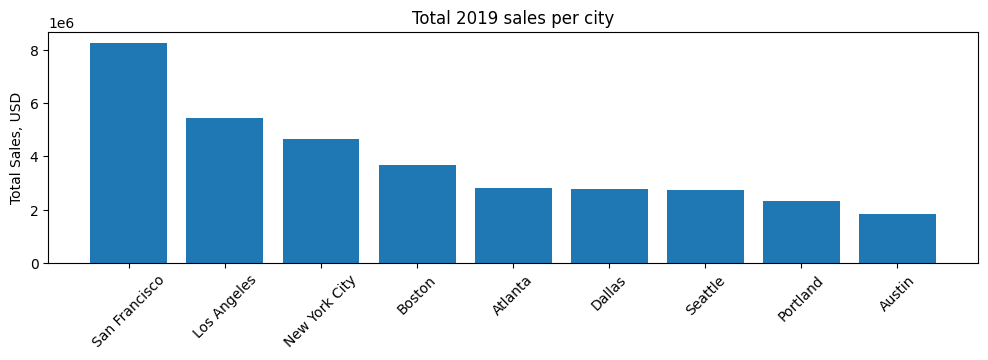

In [65]:
fig, ax = plt.subplots(figsize=(12,3))
ax.bar(x = sales_per_city.index, height = sales_per_city.values)
plt.xticks(rotation = 45)
ax.set_title('Total 2019 sales per city')
ax.set_ylabel('Total Sales, USD')
plt.show()

The top 3 selling cities are: San Francisco, Los Angeles and New York. The rest of the cities have more or less the same sales figures. I think we should put more marketing effort in the not so profitable cities, in order to rise their sales and make them more profitable.

## Key Metrics  
To perform a deeper analysis, I will calculate the following metrics. I'm following [this article at medium.com](https://medium.com/@donhalogen/enhancing-business-insights-through-a-comprehensive-review-of-2019-sales-dynamics-cf719c5eed20) from [don halogen](https://medium.com/@donhalogen) as a guide and inspiration.

- Total Annual Revenue
- Total revenue and units sold aggregated by month, product, state and city.
- Average revenues aggregated per month, product, state and city.

## Top price products

In [66]:
items = df[['product', 'price_each']].drop_duplicates()
# top ten most priced items
top_prices = items.sort_values('price_each', ascending = False).reset_index(drop=True)[:10]
top_prices

,product,price_each
0,Macbook Pro Laptop,1700.00
1,ThinkPad Laptop,999.99
2,iPhone,700.00
3,LG Dryer,600.00
4,Google Phone,600.00
5,LG Washing Machine,600.00
6,Vareebadd Phone,400.00
7,27in 4K Gaming Monitor,389.99
8,34in Ultrawide Monitor,379.99
9,Flatscreen TV,300.00


### Total annual revenue

In [67]:
# total revenue in 2019
df.revenue.sum().round(2)

34465537.77

### Total revenue and units sold aggregated by month, product, state and city.

#### Total revenue by month

In [68]:
df.groupby('month_name')['revenue'].sum()

C:\Users\danie\AppData\Local\Temp\ipykernel_10408\1476407559.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('month_name')['revenue'].sum()


month_name
January     2284818.58
February    2393981.88
March       2791020.40
April       3228561.29
May         3031130.13
June        2683101.39
July        2719467.97
August      2442972.90
September   2410665.79
October     3473646.64
November    3084853.97
December    3921316.84
Name: revenue, dtype: float64

#### Total revenue and units sold per product

In [70]:
revenue_per_product = df.groupby('product')['revenue'].sum().sort_values(ascending=False)
revenue_per_product

product
Macbook Pro Laptop           8032500.00
iPhone                       4792900.00
ThinkPad Laptop              4127958.68
Google Phone                 3317400.00
27in 4K Gaming Monitor       2433147.55
34in Ultrawide Monitor       2352898.02
Apple Airpods Headphones     2345550.00
Flatscreen TV                1443900.00
Bose SoundSport Headphones   1342865.67
27in FHD Monitor             1131074.63
Vareebadd Phone               827200.00
20in Monitor                  453818.73
LG Washing Machine            399600.00
LG Dryer                      387600.00
Lightning Charging Cable      346376.55
USB-C Charging Cable          285975.45
Wired Headphones              246082.76
AA Batteries (4-pack)         106041.60
AAA Batteries (4-pack)         92648.14
Name: revenue, dtype: float64

In [72]:
units_sold_per_product = df.groupby('product')['quantity_ordered'].sum().sort_values(ascending=False)
units_sold_per_product

product
AAA Batteries (4-pack)        30986
AA Batteries (4-pack)         27615
USB-C Charging Cable          23931
Lightning Charging Cable      23169
Wired Headphones              20524
Apple Airpods Headphones      15637
Bose SoundSport Headphones    13430
27in FHD Monitor               7541
iPhone                         6847
27in 4K Gaming Monitor         6239
34in Ultrawide Monitor         6192
Google Phone                   5529
Flatscreen TV                  4813
Macbook Pro Laptop             4725
ThinkPad Laptop                4128
20in Monitor                   4126
Vareebadd Phone                2068
LG Washing Machine              666
LG Dryer                        646
Name: quantity_ordered, dtype: int64

#### Top 5 selling products (by units sold and by revenue)

In [73]:
top5_product_units_sold = units_sold_per_product[:5]
top5_product_revenue = revenue_per_product[:5]

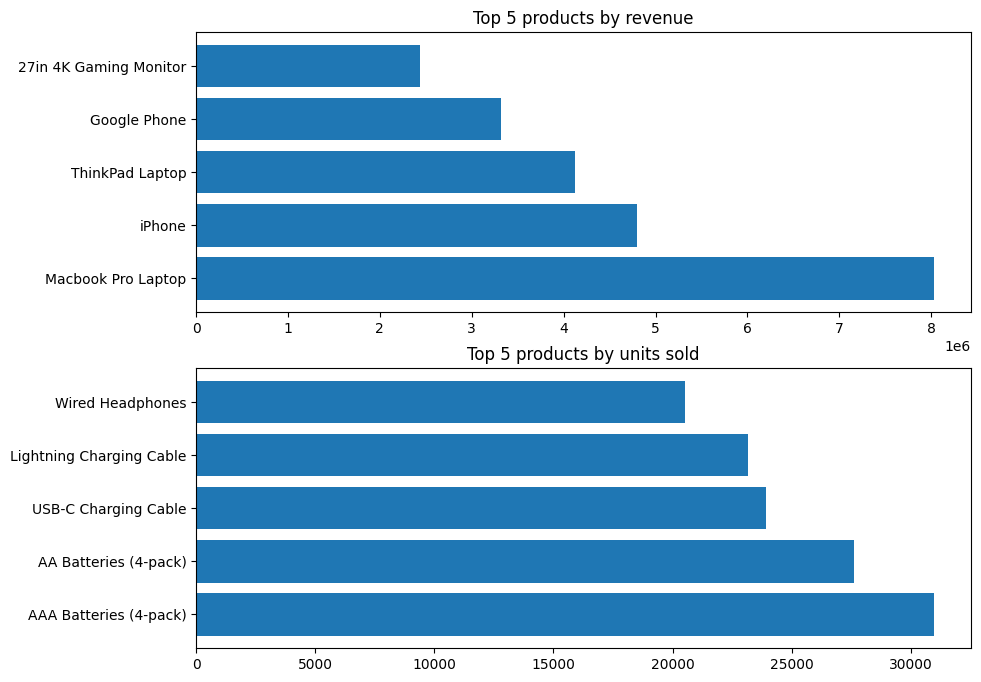

In [74]:
fig, ax = plt.subplots(2,1, figsize=(10,8))

ax[0].barh(y = top5_product_revenue.index, width = top5_product_revenue.values)
ax[0].set_title('Top 5 products by revenue')

ax[1].barh(y = top5_product_units_sold.index, width = top5_product_units_sold.values)
ax[1].set_title('Top 5 products by units sold')

plt.show()

#### Total revenue per state and city

In [76]:
revenue_per_state = df.groupby('state')['revenue'].sum().sort_values(ascending=False)
revenue_per_city = df.groupby('city')['revenue'].sum().sort_values(ascending=False)

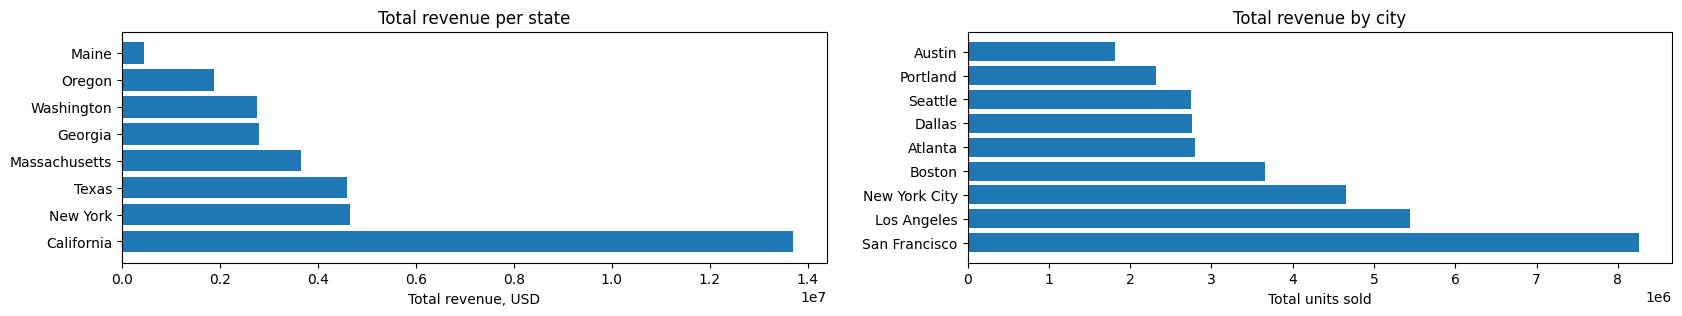

In [82]:
fig, ax = plt.subplots(1,2, figsize=(20,3))

ax[0].barh(y = revenue_per_state.index, width = revenue_per_state.values)
ax[0].set_title('Total revenue per state')
ax[0].set_xlabel('Total revenue, USD')

ax[1].barh(y = revenue_per_city.index, width = revenue_per_city.values)
ax[1].set_title('Total revenue by city')
ax[1].set_xlabel('Total units sold')
plt.show()

### Average order revenue aggregated per month, product, state and city.

#### Average monthly order revenue

In [83]:
# total revenue in 2019
df.revenue.mean().round(2)

185.61

#### Average order revenue by month

In [84]:
df.groupby('month_name')['revenue'].mean()

C:\Users\danie\AppData\Local\Temp\ipykernel_10408\1205184078.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('month_name')['revenue'].mean()


month_name
January     190.12
February    183.25
March       185.52
April       189.94
May         187.27
June        188.63
July        184.15
August      181.93
September   184.44
October     185.48
November    185.63
December    182.05
Name: revenue, dtype: float64

#### Average revenue and units sold per product

In [86]:
avg_monthly_revenue_per_product = (df.groupby(['product'])['revenue'].sum()/12).sort_values(ascending=False)
avg_monthly_revenue_per_product

product
Macbook Pro Laptop           669375.00
iPhone                       399408.33
ThinkPad Laptop              343996.56
Google Phone                 276450.00
27in 4K Gaming Monitor       202762.30
34in Ultrawide Monitor       196074.83
Apple Airpods Headphones     195462.50
Flatscreen TV                120325.00
Bose SoundSport Headphones   111905.47
27in FHD Monitor              94256.22
Vareebadd Phone               68933.33
20in Monitor                  37818.23
LG Washing Machine            33300.00
LG Dryer                      32300.00
Lightning Charging Cable      28864.71
USB-C Charging Cable          23831.29
Wired Headphones              20506.90
AA Batteries (4-pack)          8836.80
AAA Batteries (4-pack)         7720.68
Name: revenue, dtype: float64

In [87]:
avg_monthly_units_sold_per_product = (df.groupby(['product'])['quantity_ordered'].sum()/12).sort_values(ascending=False)
avg_monthly_units_sold_per_product

product
AAA Batteries (4-pack)       2582.17
AA Batteries (4-pack)        2301.25
USB-C Charging Cable         1994.25
Lightning Charging Cable     1930.75
Wired Headphones             1710.33
Apple Airpods Headphones     1303.08
Bose SoundSport Headphones   1119.17
27in FHD Monitor              628.42
iPhone                        570.58
27in 4K Gaming Monitor        519.92
34in Ultrawide Monitor        516.00
Google Phone                  460.75
Flatscreen TV                 401.08
Macbook Pro Laptop            393.75
ThinkPad Laptop               344.00
20in Monitor                  343.83
Vareebadd Phone               172.33
LG Washing Machine             55.50
LG Dryer                       53.83
Name: quantity_ordered, dtype: float64

#### Average order revenue per state and city

In [89]:
avg_revenue_per_state = df.groupby('state')['revenue'].mean().sort_values(ascending=False)
avg_revenue_per_city = df.groupby('city')['revenue'].mean().sort_values(ascending=False)

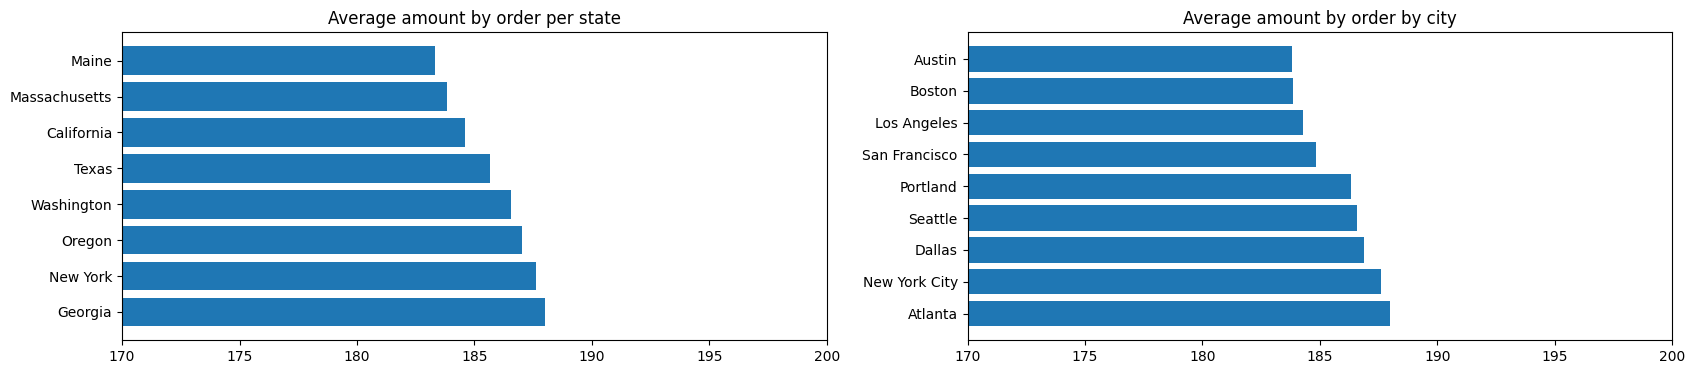

In [93]:
fig, ax = plt.subplots(1,2, figsize=(20,4))

ax[0].barh(y = avg_revenue_per_state.index, width = avg_revenue_per_state.values)
ax[0].set_title('Average amount by order per state')
ax[0].set_xlim([170,200])
ax[1].barh(y = avg_revenue_per_city.index, width = avg_revenue_per_city.values)
ax[1].set_title('Average amount by order by city')
ax[1].set_xlim([170,200])
plt.show()